## Домашнее творческое задание по дисциплине "Технологии обработки больших данных"

Выполнил: студент группы __ПМ20-4 Беленький Михаил Александрович__

Вариант: __10__

    

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import xlwings as xw
import xlsxwriter
import nltk
from nltk.probability import FreqDist
# nltk.download('punkt')

__Задание 1__. В файле `steam_games.json` находится информация об играх из магазина Steam. При помощи пакета `json` считайте файл. Выведите на экран количество игр жанра RPG, самым популярным языком которых является русский. "Язык является самым популярным" означает, что ранг этого языка в списке языков равен 0.

In [2]:
steam_games = json.loads(open('steam_games.json', mode='r', encoding='utf-8').read())

In [3]:
russia_rpg_count = 0
for i, game in enumerate(steam_games):
    try: ('RPG' in game['genres'])&(list(game['languages'][0].values())==['Russian', 0])
    except IndexError: pass
    else:    
        if(('RPG' in game['genres'])&(list(game['languages'][0].values())==['Russian', 0])):
            russia_rpg_count +=1
print(f'Всего {russia_rpg_count} игр жанра RPG, самым популярным языком которых является русский')

Всего 69 игр жанра RPG, самым популярным языком которых является русский


__Задание 2__. Преобразуйте данные из файла, предложенного в задании 1, в `pd.DataFrame` и свяжите его с переменной `games_df`. Удалите столбцы, содержащие более 65% пропусков. Пересортируйте столбцы таблицы в порядке возрастания количества уникальных элементов в столбце. Столбцы, содержащие списковые значения (если они имеются), поместите последними.

In [4]:
games_df = pd.read_json('steam_games.json')
len(games_df.columns), games_df.columns

(23,
 Index(['url', 'types', 'name', 'desc_snippet', 'release_date', 'developer',
        'publisher', 'popular_tags', 'game_details', 'languages',
        'achievements', 'game_description', 'mature_content',
        'minimum_requirements', 'recommended_requirements', 'original_price',
        'discount_price', 'reviews_mood', 'reviews_cnt', 'genres',
        'avg_rating_users', 'avg_rating_critics', 'selled'],
       dtype='object'))

Столбцы, где больше, чем 65% пропусков:

In [5]:
games_df.columns[np.where(games_df.isna().sum()/len(games_df)>0.65)]

Index(['achievements', 'mature_content'], dtype='object')

In [6]:
games_df.drop(columns=games_df.columns[np.where(games_df.isna().sum()/len(games_df)>0.65)],inplace=True)
len(games_df.columns), games_df.columns

(21,
 Index(['url', 'types', 'name', 'desc_snippet', 'release_date', 'developer',
        'publisher', 'popular_tags', 'game_details', 'languages',
        'game_description', 'minimum_requirements', 'recommended_requirements',
        'original_price', 'discount_price', 'reviews_mood', 'reviews_cnt',
        'genres', 'avg_rating_users', 'avg_rating_critics', 'selled'],
       dtype='object'))

Создаём список с новым порядком столбцов: сначала столбцы без списковых значений по возрастанию количества уникальных элементов, затем столбцы со списковыми значениями с аналогичной сортировкой

In [7]:
mask = list()
new_indexes = list()

for column in games_df:
    mask.append(isinstance(games_df.iloc[0][column], list))

new_indexes.extend(list(games_df[list(games_df.columns[np.logical_not(mask)])].\
                   apply(lambda x: len(x.value_counts())).sort_values(ascending=True).index))
new_indexes.extend(list(games_df[list(games_df.columns[mask])].\
                   apply(lambda x: len(x.value_counts())).sort_values(ascending=True).index))

games_df = games_df.reindex(columns=new_indexes)
games_df.head(3)

,types,reviews_mood,avg_rating_users,avg_rating_critics,original_price,selled,discount_price,release_date,recommended_requirements,minimum_requirements,...,developer,desc_snippet,reviews_cnt,game_description,name,url,genres,game_details,languages,popular_tags
0,app,positive,77,63,$3.99,1189.0,$3.19,"Nov 3, 2018","Recommended:,OS:,Windows Xp / Vista / 7,Proces...","Minimum:,OS:,Windows Xp / Vista / 7,Processor:...",...,Erik Sheader-Smith,A surreal post-life adventure,6952,About This Game All sales of this game will ...,The Endless Empty,https://store.steampowered.com/app/959410/The_...,"[Adventure, Indie, RPG]","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]","[Adventure, RPG, Indie, RPGMaker, Story Rich, ..."
1,app,very negative,94,49,$14.99,100.0,None,"Apr 22, 2019","Recommended:,OS:,Windows 10,Processor:,2.3 Ghz...","Minimum:,OS:,Windows 7,Processor:,1.8 GHz,Memo...",...,Ant.Karlov,"Fight to survive on a mysterious alien planet,...",5115,About This Game A brand new entry to the Zomb...,Zombotron,https://store.steampowered.com/app/664830/Zomb...,"[Action, Adventure, Indie]","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}, {'lang': 'Ger...","[Action, Adventure, Indie, 2D, Zombies, Single..."
2,app,negative,58,98,$14.99,100.0,$80.17,"Aug 22, 2016",None,None,...,Lion's Shade,Tempest is a Pirate Open World Action RPG wher...,1266,About This Game Game Features Always somethi...,Tempest: Pirate Action RPG,https://store.steampowered.com/app/418180/Temp...,"[Action, Indie, RPG]","[Single-player, Multi-player, Co-op, Steam Ach...","[{'lang': 'Japanese', 'rank': 0}, {'lang': 'Ge...","[Pirates, Naval, Action, Open World, RPG, Sing..."


__Задание 3__. Выберите из таблицы `games_df` столбцы `avg_rating_users` и `avg_rating_critics`. Преобразуйте полученный набор данных в массив `numpy`. Известно, что существуют такие $i\in I$ и $j \in I$, что $u_i+c_j = 131$. Найдите хотя бы одну пару $(i, j)$, выведите ее на экран, а также выведите на экран элементы, дающие эту сумму. Здесь где $u_i$ - значение столбца `avg_rating_users` для $i$-й строчки; $c_j$ - значение столбца `avg_rating_critics` для $j$-й строчки; $I$ - множество номеров строк.

In [8]:
arrating = games_df[['avg_rating_users','avg_rating_critics']].to_numpy()

Сначала перебираем пары, где $i=j$ : если не нашлось такой пары, то ищем пару, перебирая все элементы

In [9]:
sum_ij = 131
break_out_flag = False

try:
    list(map(sum,arrating)).index(sum_ij)
except ValueError:
    for i in np.transpose(arrating)[0]:
        for j in np.transpose(arrating)[1]:
            if i+j == 198:
                print(f'({i}, {j}) \n{np.transpose(arrating)[0][i]} + {np.transpose(arrating)[1][j]} = {sum_ij}')
                break_out_flag = True
                break
        if break_out_flag:
            break                     
else:
    index = list(map(sum,arrating)).index(sum_ij)
    print(f'({index}, {index}) \n{np.transpose(arrating)[0][index]} + {np.transpose(arrating)[1][index]} = {sum_ij}')

(21, 21) 
61 + 70 = 131


__Задание 4__. Преобразуйте столбец `original_price` в числовой. Удалите строки, в которых значение в данном столбце больше, чем величина 3 квартиля столбца. Проведите [min-max нормализацию](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization) столбцов `original_price` и `selled`. Постройте диаграмму рассеяния на основе двух этих столбцов. Сделайте цвет точек черным, размер точек - 5. Добавьте подписи осей (вертикальной и горизонтальной) и заголовок рисунка. Проведите прямую линию от точки (0, 1) до (1, 0). Сделайте эту линию красной и пунктирной.

In [10]:
games_df.original_price =  games_df.iloc[np.where(games_df.original_price.isnull()==False)].\
original_price.apply(lambda x: (float(x.split('$')[1])))

In [11]:
print((games_df.original_price).dtype)
games_df[['original_price']].head()

float64


,original_price
0,3.99
1,14.99
2,14.99
3,9.99
4,NaN


In [12]:
games_df.drop(games_df.index[np.where(games_df.original_price > games_df.original_price.quantile(.75))], inplace=True)
games_df.head(2)

,types,reviews_mood,avg_rating_users,avg_rating_critics,original_price,selled,discount_price,release_date,recommended_requirements,minimum_requirements,...,developer,desc_snippet,reviews_cnt,game_description,name,url,genres,game_details,languages,popular_tags
0,app,positive,77,63,3.99,1189.0,$3.19,"Nov 3, 2018","Recommended:,OS:,Windows Xp / Vista / 7,Proces...","Minimum:,OS:,Windows Xp / Vista / 7,Processor:...",...,Erik Sheader-Smith,A surreal post-life adventure,6952,About This Game All sales of this game will ...,The Endless Empty,https://store.steampowered.com/app/959410/The_...,"[Adventure, Indie, RPG]","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]","[Adventure, RPG, Indie, RPGMaker, Story Rich, ..."
3,app,very positive,51,87,9.99,559.0,None,"Jun 3, 2016","Recommended:,OS:,Windows XP, Vista, 7x , 8x or...","Minimum:,OS:,Windows XP, Vista, 7x , 8x or 10x...",...,"SmiteWorks USA, LLC",None,12492,About This Content A tale of power and corru...,Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,https://store.steampowered.com/app/484940/Fant...,"[Indie, RPG, Strategy]","[Multi-player, Co-op, Cross-Platform Multiplay...","[{'lang': 'English', 'rank': 0}]","[Strategy, RPG, Indie]"


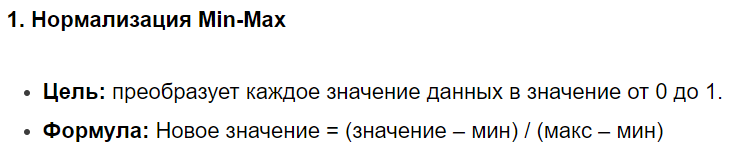

Для столбца `original_price`

In [13]:
min, max = games_df.original_price.min(), games_df.original_price.max()
games_df.original_price = games_df.original_price.apply(lambda x: ((x-min)/(max-min)))

Для столбца `selled`

In [14]:
min, max = games_df.selled.min(), games_df.selled.max()
games_df.selled = games_df.selled.apply(lambda x: ((x-min)/(max-min)))

In [15]:
games_df[['original_price','selled']].head()

,original_price,selled
0,0.301784,0.730229
3,0.767261,0.264597
4,NaN,NaN
5,NaN,NaN
7,0.146625,0.871397


Диаграмма рассеяния столбцов `original_price` и `selled`

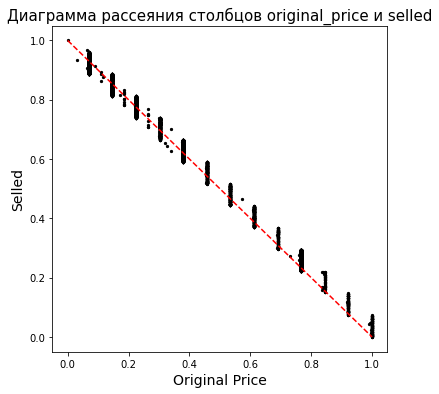

In [16]:
fig = plt.figure(figsize=(6,6))
plt.title('Диаграмма рассеяния столбцов original_price и selled',fontsize=15)
plt.xlabel('Original Price',fontsize=14)
plt.ylabel('Selled',fontsize=14)

plt.scatter(x=games_df.original_price, y=games_df.selled, c='black', s=5)
plt.plot([0, 1], [1, 0], linestyle='--', c='red')
plt.show()

__Задание 5__. Для каждого описания из столбца `game_description` таблицы `games_df` выясните, сколько в нем содержится предложений и слов. Добавьте 2 столбца: `n_words` и `n_sents`. В столбце  `n_words` укажите количество слов в описании. В столбце `n_sents` укажите количество предложений в описании. Для тех описаний, в которых больше 30 предложений, найдите топ-5 самых часто используемых слов.

In [17]:
games_df['n_words'] = games_df.game_description.str.len()

In [18]:
games_df['n_sents'] = games_df.game_description.apply(lambda x: len(nltk.sent_tokenize(str(x))))

In [19]:
games_df[['n_words','n_sents']].head()

,n_words,n_sents
0,1541.0,20
3,1177.0,10
4,NaN,1
5,196.0,1
7,1137.0,12


In [20]:
games_df.iloc[np.where(games_df.n_sents>30)].game_description

18       About This Game  Setting the scene It’s World...
68       About This Game Earth, Year 3250, Civilizatio...
77       About This Game "Ghost" is a metroidvania whe...
102      About This Game The year is 1291 and the crus...
128      About This Game Design clothing and romance a...
                              ...                        
9837     About This Game  The world of Elteria is full...
9866     About This Content AR-K Chapter 1 Tracklist  ...
9884     About This Game  Description WakeUp! is a cas...
9903     About This Content This DLC contains 48 CGs t...
9933     About This Content The Portal 2 soundtrack wa...
Name: game_description, Length: 253, dtype: object

In [21]:
desc_vocabulary = list()
more30sentsdesc = games_df.iloc[np.where(games_df.n_sents>30)].game_description.\
apply(lambda x: nltk.tokenize.RegexpTokenizer(r'[a-zA-Z]+').tokenize(x))

for describtion in more30sentsdesc:
    desc_vocabulary.extend(describtion)
    
FreqDist(desc_vocabulary).most_common(5)

[('the', 7104), ('and', 4568), ('to', 4133), ('of', 3775), ('a', 3046)]

__Задание 6__. Сохрание текущее состояние `games_df` в рабочую книгу "games.xlsx". Для каждого числового столбца при помощи протягиваемых формул Excel найдите среднее значение элементов в столбце. Поместите результаты вычислений после таблицы с данными. Добавьте в строку со средними значениями цветовую шкалу от синего (ближе к минимуму) до зеленого (ближе к максимуму). Создайте лист "Визуализация" и разместите на нем рисунок из задания 4, начиная с ячейки "F3". Вставьте в ноутбук скриншоты листов Excel, подтверждающие корректность выполнения задания.

* Примечание: для выявления типа столбца в Excel вы можете воспользоваться функций ЕЧИСЛО и проверить первый элемент в соответствующем столбце.

In [22]:
games_df.to_excel("games.xlsx")

In [23]:
workbook = xw.Book('games.xlsx')
worksheet = workbook.sheets['Sheet1']
worksheet.name = 'Games'

worksheet.range('B8050:X8050').formula = '=IF(ISNUMBER(B2)=TRUE,AVERAGE(B2:B8049),"")'

Создаем список цветов заливки ячеек со средними значениями числовых столбцов из кортежей с RGB-значениями, где минимальное значение – *синий*, максимальное – *зелёный*

In [24]:
averages =  worksheet.range('B8050:X8050').options(np.array).value
max = averages[np.where(averages != '')].astype(float).max()
colorlist = list()

for i in averages:
    if i == '':
        colorlist.append(None)
    else:
        colorlist.append(tuple((51+np.round(102*float(i)/max),
                                154+np.round(101*float(i)/max),
                                255-np.round(204*float(i)/max))))

for i, cell in enumerate(worksheet.range('B8050:X8050')):
    cell.color = colorlist[i]

In [25]:
workbook_v = workbook.sheets.add('Визуализация')

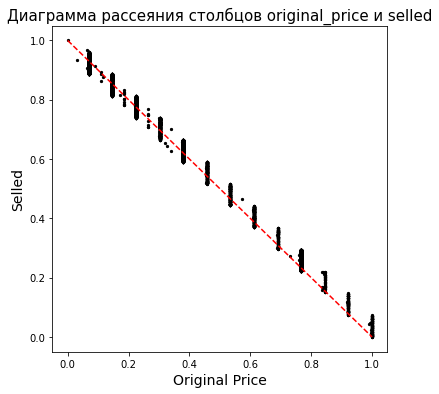

In [26]:
fig = plt.figure(figsize=(6,6))
plt.title('Диаграмма рассеяния столбцов original_price и selled',fontsize=15)
plt.xlabel('Original Price',fontsize=14)
plt.ylabel('Selled',fontsize=14)

plt.scatter(x=games_df.original_price, y=games_df.selled, c='black', s=5)
plt.plot([0, 1], [1, 0], linestyle='--', c='red')
plt.show()

In [27]:
workbook_v.pictures.add(fig, name='Scatter.png', 
                       update=True, 
                       left=workbook_v.range('F3').left,
                       top=workbook_v.range('F3').top,
                       scale = 0.75)

<Picture 'Scatter.png' in <Sheet [games.xlsx]Визуализация>>

### Общий вид созданного Excel-файла

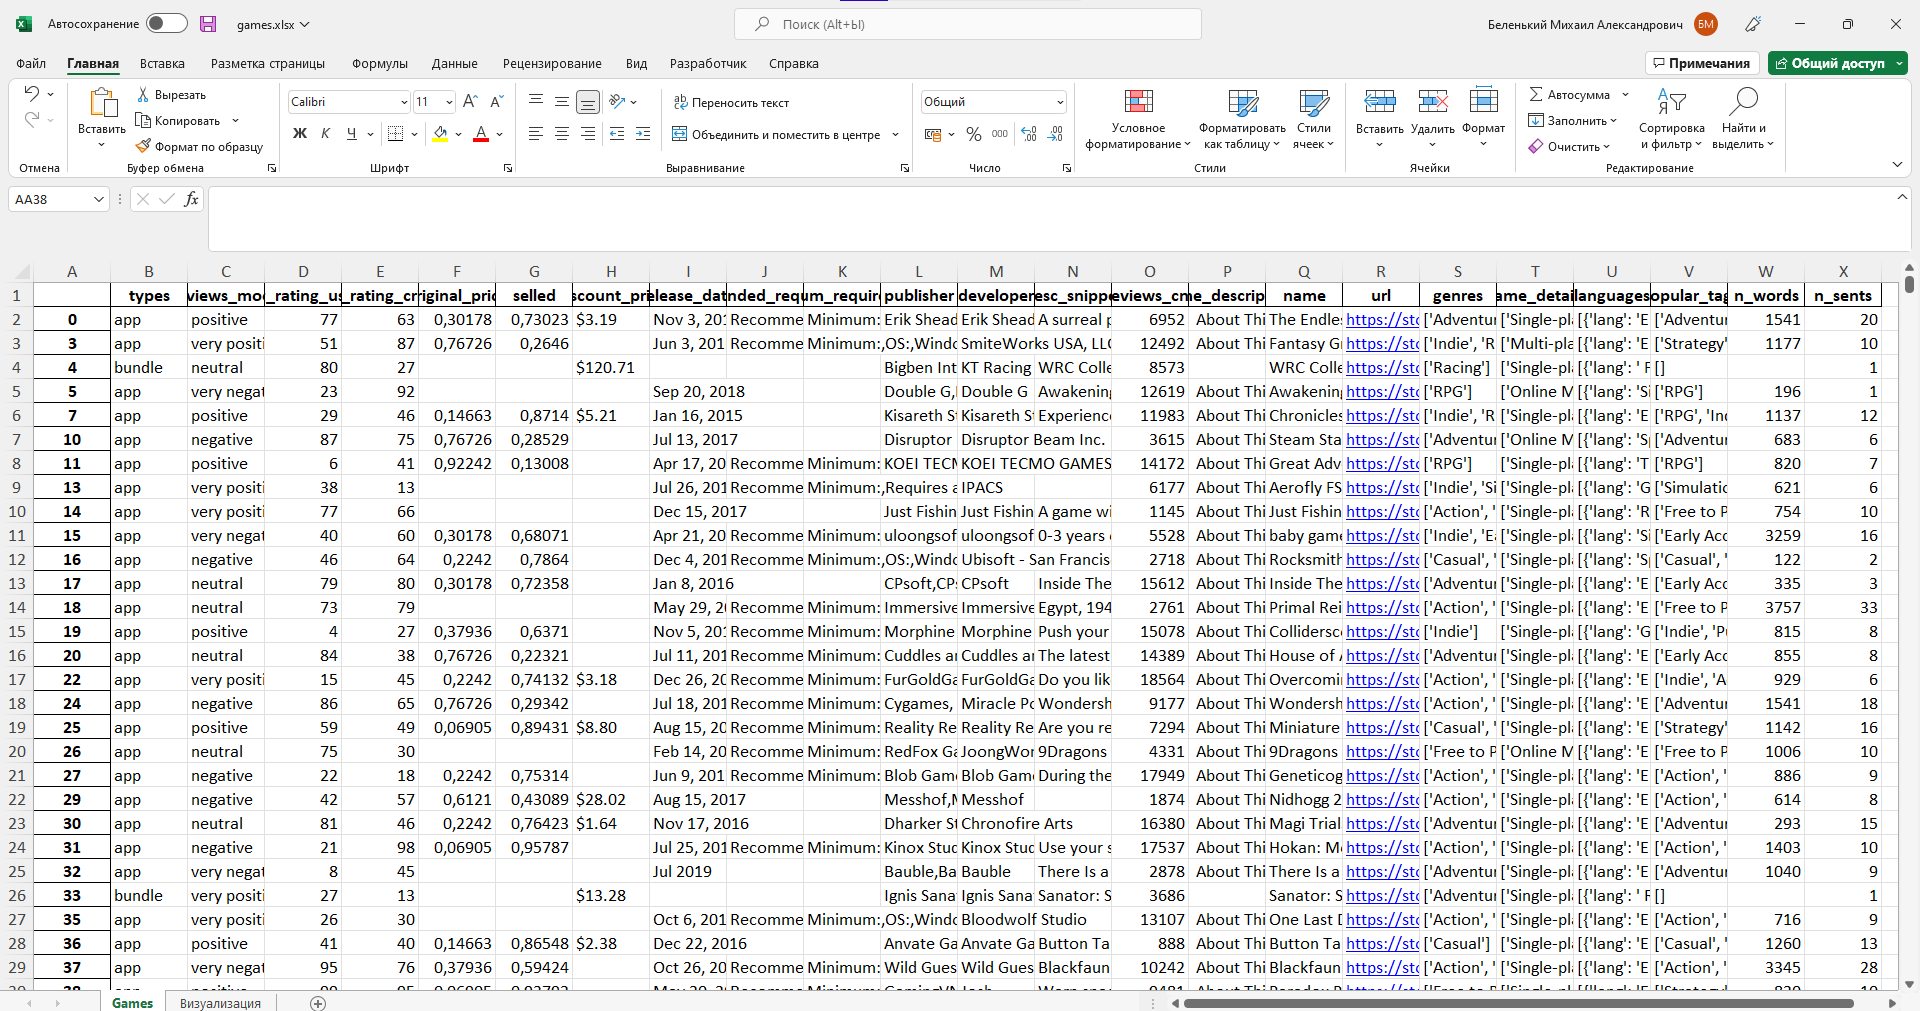

### Средние значения числовых столбцов с градиентным заполнением в зависимости от величины значения ячейки

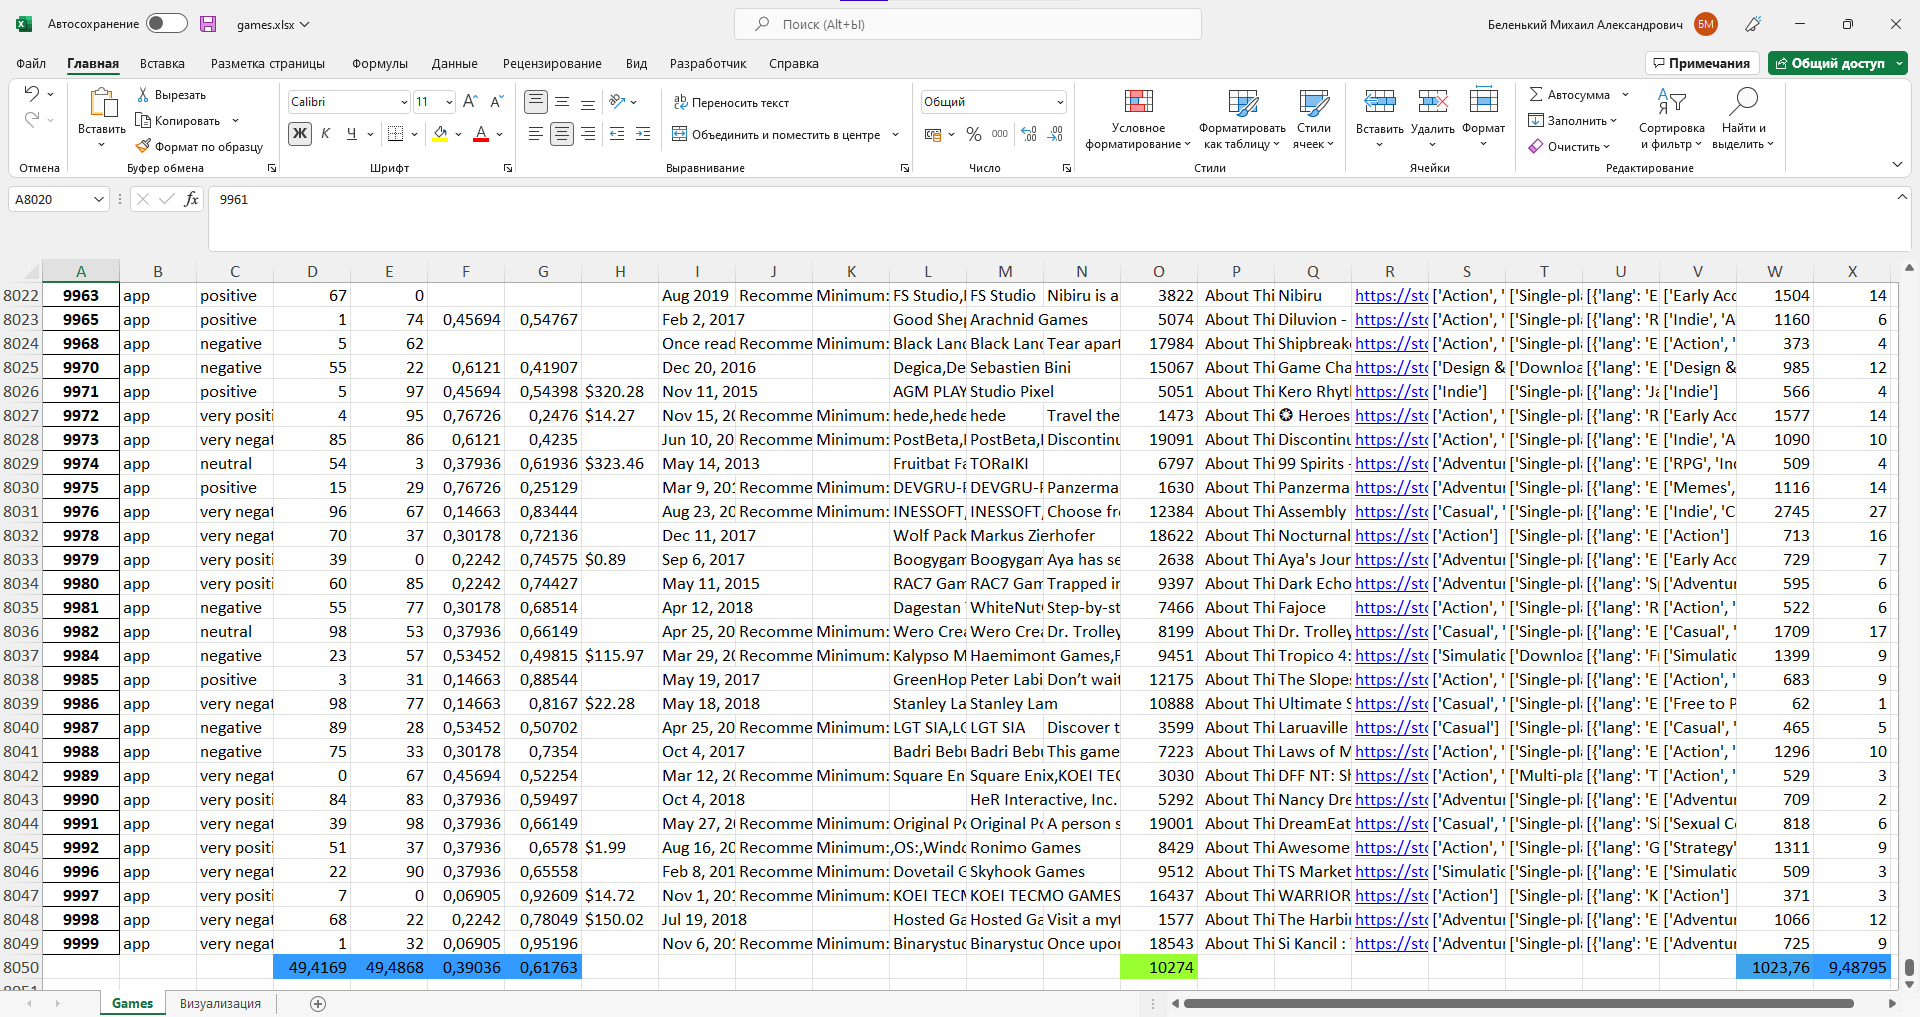

### График из задания №4, начинающийся с ячейки F3

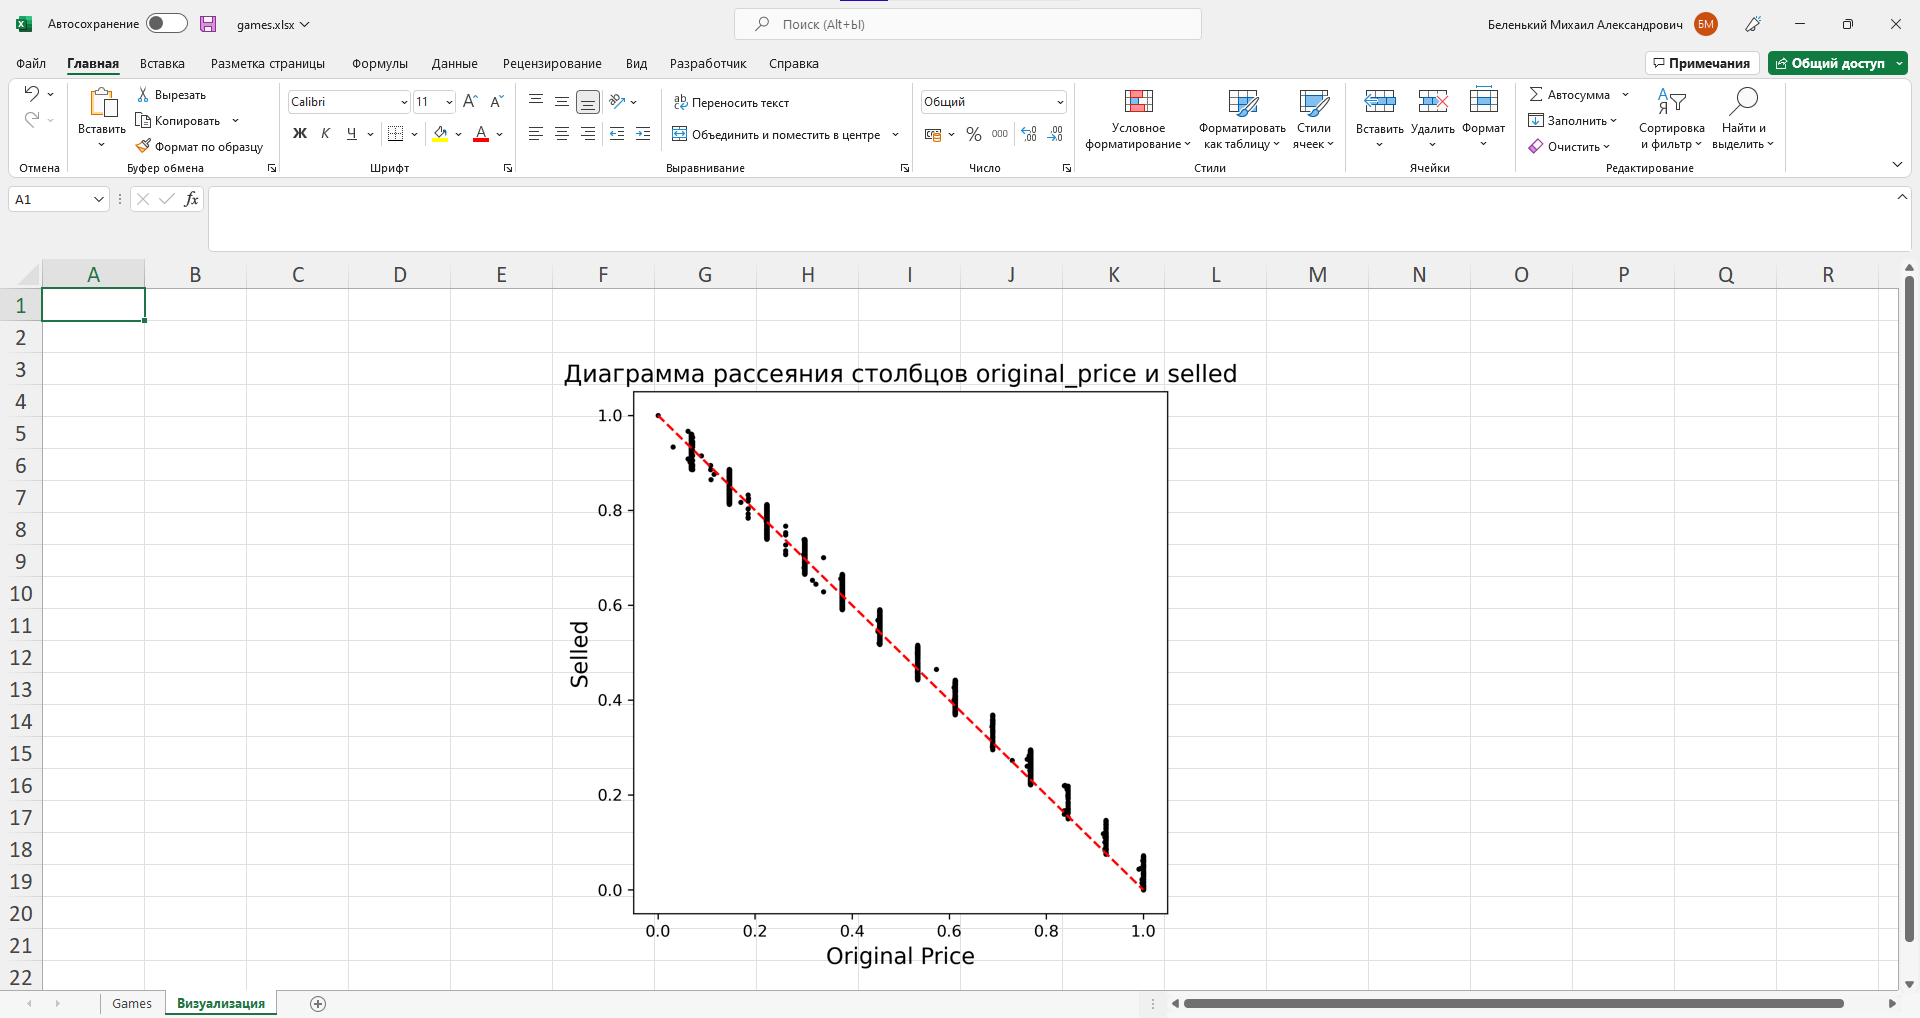

In [28]:
workbook.save()
workbook.close()